# In order to start on this project, please download the data set from
# https://zenodo.org/record/4048312#.YDjKw-oo9H5

Data Manipulation Starts here:

---



**Importing the Libraries Needed**

In [ ]:
import os
import glob
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score


The Function takes the input as a string, and convert string values into floating points on the basis of delimeters for each value of the list, and also for the number of lists. 
If the parameter of pad_feature is 0, it will not pad the list, however for the numeric value of the parameter, it will also pad the entire list to that particular length. 


In [ ]:
def covert_feature(string, pad_feature = 0):
    feat = []
    lines = string.split(":")
    for line in lines:
        f = []
        features = line.split(',')[:-1]
        for feature in features:
            f.append(float(feature))
        if pad_feature == 0:
            feat.append(f)
        else:
            i = len(f)
            while i != pad_feature:
                f.append(0.0)
                i += 1
            feat.append(f)
    if pad_feature == 0:
      return feat, len(feat[0])
    else:
      ff = []
      for f in feat:
        ff.append(f)
      return ff

The following cell, loads the data into the lists, converts the string input into mfcc floating point features, and then finally convert the entire data set into np.arrays


In [ ]:
def getFilesList():
  from google.colab import drive
  drive.mount('/content/drive/')
  import os
  %cd /content/drive/My Drive/Colab Notebooks/All Features
  files = os.listdir("/content/drive/My Drive/Colab Notebooks/All Features")
  return files

def getFeatures():
  files = getFilesList()
  y = []
  X = []
  fileNamesRead = []
  i = 0
  for f in files:
    featureFile = open(f, 'r')
    print("Reading Features from File: " + f)
    for lines in featureFile:
      num_features = lines.split("|")
      for features in num_features:
        feat_float = features.split("_")
        if len(feat_float) == 1:
          continue
        fileNamesRead.append(feat_float[0])
        X.append(feat_float[1])
        y.append(feat_float[2])
        i += 1
  print(f , " is done")
  print(len(fileNamesRead), len(y))
  del files
  del i
  return X, fileNamesRead, y
# X , fileNamesRead, y = getFeatures()
XX = []
for feature in X:
  XX.append(covert_feature(feature, 872))
del X
npArray = np.array(XX, dtype = object)
del XX
y = np.array(y, dtype = object)
X_train, X_test, y_train, y_test = train_test_split(npArray, y)
del npArray
del y
a, b, c = X_train.shape
X_train = X_train.reshape((a,b*c))
a, b, c = X_test.shape
X_test = X_test.reshape((a,b*c))
del a
del b
del c


Feature Extraction from wav files, and writing and storing them for furture reuse. 

In [ ]:
path = '/home/omer/Desktop/Data Features/Data Feature/'
json_dir_name = '/home/omer/Desktop/FinalDATA/'

Converting the feature into string to store in the txt files for later use. 

In [ ]:
def convert_string(feature):
    st = ""
    for f in feature:
        st += str(f)
        st += ","
    return st[:-1]

Converting the entire features into string by calling the convert_string method

In [ ]:
def convertFeaturesIntoString(mfccs):
    string = ''
    for feature in mfccs:
        string += convert_string(feature)
        string += ":"
    return string

After converting the audio files into MFCC features, we will call the convertFeaturesIntoString method and save them into files. 

In [ ]:
def extractFeatures(file_list):
    totalFeatures = []
    for file in file_list:
        x,sr = librosa.load(file)#EXTRACTING FEATURS
        mfccs = librosa.feature.mfcc(x, sr=sr)
        ff = open("/home/faaira/Desktop/Data Features/" +file.split('/')[5].split('.')[0] + ".txt", 'w')#STORING INTO TXT
        stringOfFeatures = convertFeaturesIntoString(mfccs)#converting mfcc into string to store for later use
        ff.write(stringOfFeatures[:-1])
        ff.close()
        totalFeatures.append((mfccs, file.split('/')[5].split('.')[0]))
        del ff
        del x
        del sr
        del mfccs

Getting the longest size of list to apply padding. 

In [ ]:
def getLongestListSize(features):
    long = 0
    for feature in features:
        lon = len(feature[0])
        if lon > long:
            long = lon
    return long


Reading the features from files, and then appling the convert to floating point algorithm on them

In [ ]:
def ReadFeaturesFromFiles(numFeatures, files):
    # files = os.listdir(path)
    path = "/content/drive/My Drive/Colab Notebooks/Features/Labled Data/"
    features = []
    data = open("/content/drive/My Drive/Colab Notebooks/Features/labled_Files.txt").readlines()
    finalData = []
    for d in data:
        finalData.append(d[:-1])
    del data
    filesOpened = []
    i = 0
    max = 0
    for f in files:
        if i == numFeatures:
            break
        if f.split(".")[0] in finalData:
            alpha = open(path + f, 'r')
            filesOpened.append(path+f)
            for lines in alpha:
                fea , lenFea = covert_feature(lines)
                features.append(fea)
                if lenFea > max:
                  max = lenFea
            i += 1
            alpha.close()
    # del features
    # features = []
    final_features = []
    for file_feature in features:
        alpha = []
        for feature in file_feature:
            i = len(feature)
            while i != max:
                feature.append(0.0)
                i += 1
            alpha.append(feature)
        final_features.append(alpha)
        

    # for fO in filesOpened:
    #     alpha = open(fO, 'r')
    #     for lines in alpha:
    #         features.append(covert_feature(lines, max))
        
    return final_features, finalData

getClassificationOriginal get's the labels of each cough sample from the coughvid data source from JUNE 2021


In [ ]:
def getClassificationOriginal(size, finalData):
    metadata = open("/content/drive/My Drive/Colab Notebooks/Features/metadata_compiled.csv", 'r')
    y_ = []
    for lines in metadata:
        if len(y_) == size:
            break
        if lines.split(',')[0].split('.')[0] in finalData:
            y_.append(lines.split(',')[9])
    return y_

Training and splitting the features, and then resamplaing it into a 2D array for model testing and training

In [ ]:
def train_testing_splitting_features(features, y):
    npArray = np.array(features, dtype = object)
    y = np.array(y, dtype = object)
    X_train, X_test, y_train, y_test = train_test_split(npArray, y)
    print(X_train.shape)
    # nsamples, nx, ny = X_train.shape
    # X_train = X_train.reshape((nsamples,nx*ny))
    # nsamples, nx, ny = X_test.shape
    # X_test = X_test.reshape((nsamples,nx*ny))
    return X_train, X_test, y_train, y_test

Getting the features of the files
Splitting the data into test and train

In [ ]:
def getFeatures_and_train( X, y):
    # features, labledFiles = ReadFeaturesFromFiles(numFeatures, file)
    # y = getClassificationOriginal(numFeatures, labledFiles)
    X_train, X_test, y_train, y_test = train_testing_splitting_features(X, y)
    return X_train, X_test, y_train, y_test

# SGDClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


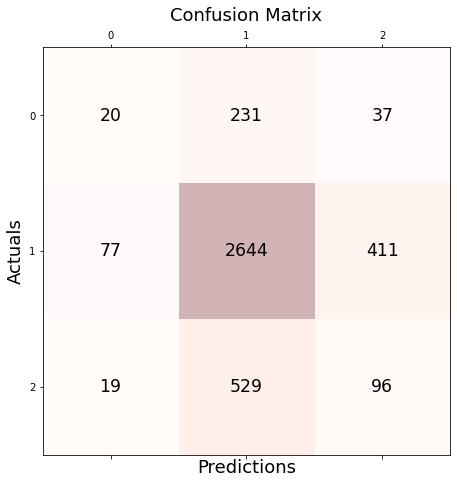

Accuracy =  0.6791338582677166
F1 Score
Macro:   0.3565611967153468
Micro:   0.6791338582677166
Weighted:   0.6561426761369457
None:  [0.0990099  0.80905753 0.16161616]


In [ ]:
def sgdClassifier(X_train, X_test, y_train, y_test):
    clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
    clf.fit(X_train, y_train)#fitting
    y_pred = clf.predict(X_test)#prediction
    CMSGD = confusion_matrix(y_test, y_pred)#getting confusion matrix
    sgd_accuracy = accuracy_score(y_pred, y_test)#getting accuracy
    del clf#deleting the clf to save the colab from crashing
#printing and plotting
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(CMSGD, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(CMSGD.shape[0]):
        for j in range(CMSGD.shape[1]):
            ax.text(x=j, y=i,s=CMSGD[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", sgd_accuracy)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
sgdClassifier(X_train, X_test, y_train, y_test)

# KNeighborsClassifier

K = 3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


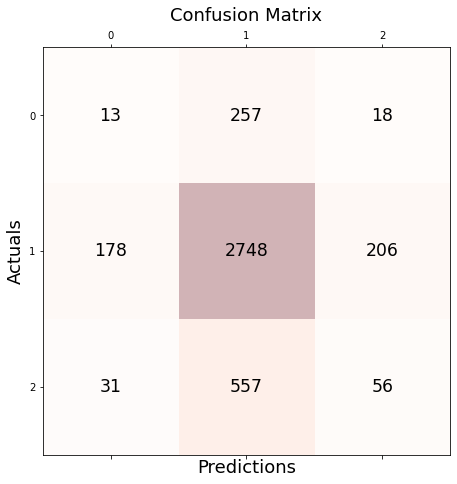

Accuracy =  0.6931594488188977
F1 Score
Macro:   0.331075424982172
Micro:   0.6931594488188977
Weighted:   0.6555661171906035
None:  [0.05098039 0.82103376 0.12121212]


In [ ]:

def Knn3(X_train, X_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    knn3_acc = accuracy_score(y_pred, y_test)
    knn3_CM = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(knn3_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(knn3_CM.shape[0]):
        for j in range(knn3_CM.shape[1]):
            ax.text(x=j, y=i,s=knn3_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", knn3_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
Knn3(X_train, X_test, y_train, y_test)

K = 1

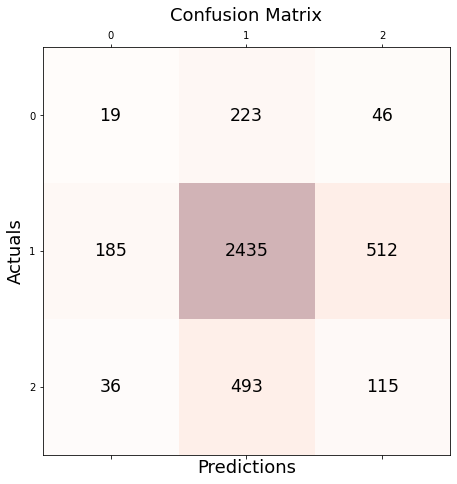

Accuracy =  0.6321358267716536
F1 Score
Macro:   0.34057215384649364
Micro:   0.6321358267716536
Weighted:   0.6301258567433037
None:  [0.0719697  0.77510743 0.17463933]


In [ ]:
def Knn1(X_train, X_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    knn1_acc = accuracy_score(y_pred, y_test)
    knn1_CM = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(knn1_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(knn1_CM.shape[0]):
        for j in range(knn1_CM.shape[1]):
            ax.text(x=j, y=i,s=knn1_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", knn1_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
Knn1(X_train, X_test, y_train, y_test)


K = 5

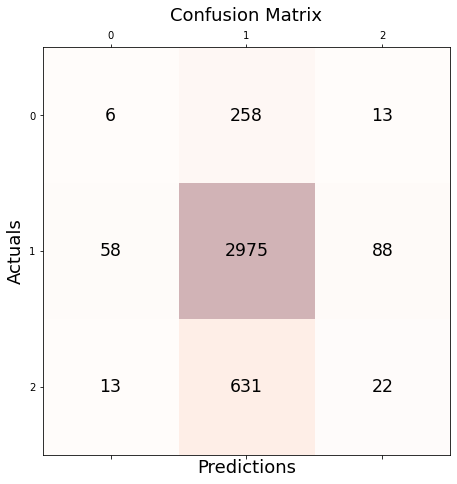

Accuracy =  0.7389271653543307
F1 Score
Macro:   0.3138301461694804
Micro:   0.7389271653543307
Weighted:   0.6656194392479828
None:  [0.03389831 0.85182534 0.05576679]


In [ ]:
def Knn5(X_train, X_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    knn5_acc = accuracy_score(y_pred, y_test)
    knn5_CM = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(knn5_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(knn5_CM.shape[0]):
        for j in range(knn5_CM.shape[1]):
            ax.text(x=j, y=i,s=knn5_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", knn5_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
Knn5(X_train, X_test, y_train, y_test)

K = 10

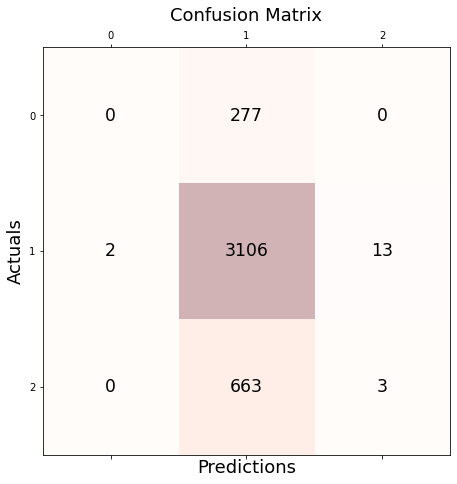

Accuracy =  0.7650098425196851
F1 Score
Macro:   0.2918493458873426
Micro:   0.7650098425196852
Weighted:   0.6670736183745032
None:  [0.         0.86675038 0.00879765]


In [ ]:
def Knn10(X_train, X_test, y_train, y_test):
    neigh = KNeighborsClassifier(n_neighbors=10)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    knn10_acc = accuracy_score(y_pred, y_test)
    knn10_CM = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(knn10_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(knn10_CM.shape[0]):
        for j in range(knn10_CM.shape[1]):
            ax.text(x=j, y=i,s=knn10_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", knn10_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
Knn10(X_train, X_test, y_train, y_test)

# SVM

In [ ]:
from sklearn.svm import SVC
def svmClassifier(X_train, X_test, y_train, y_test):
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    del clf
    svm_acc = accuracy_score(y_pred, y_test)
    svm_CM = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(svm_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(svm_CM.shape[0]):
        for j in range(svm_CM.shape[1]):
            ax.text(x=j, y=i,s=svm_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", svm_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
svmClassifier(X_train, X_test, y_train, y_test)

# RandomForestClassifier

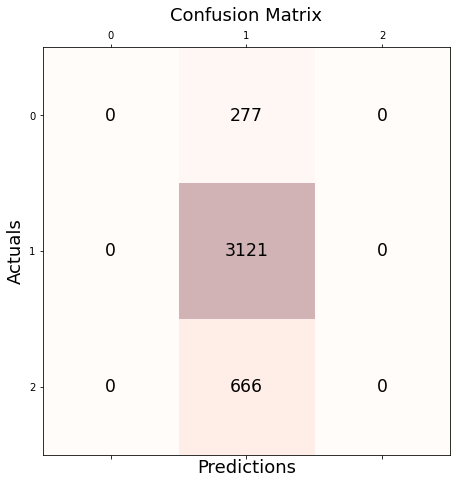

Accuracy =  0.7679625984251969
F1 Score
Macro:   0.28958478311296687
Micro:   0.7679625984251969
Weighted:   0.6671708475114934
None:  [0.         0.86875435 0.        ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
def RFC(X_train, X_test, y_train, y_test, plt):
    clf = RandomForestClassifier(max_depth=6, random_state=0)
    clf.fit(X_train, y_train)#fitting
    y_pred = clf.predict(X_test)#prediction
    del clf#deleting to save the colab from crashing
    RFC_acc = accuracy_score(y_pred, y_test)#getting accuracy
    RFC_CM = confusion_matrix(y_test, y_pred)#getting confusion matrix
    #printing and plotting
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(RFC_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(RFC_CM.shape[0]):
        for j in range(RFC_CM.shape[1]):
            ax.text(x=j, y=i,s=RFC_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    del plt
    print("Accuracy = ", RFC_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
RFC(X_train, X_test, y_train, y_test, plt)

# GaussianNB

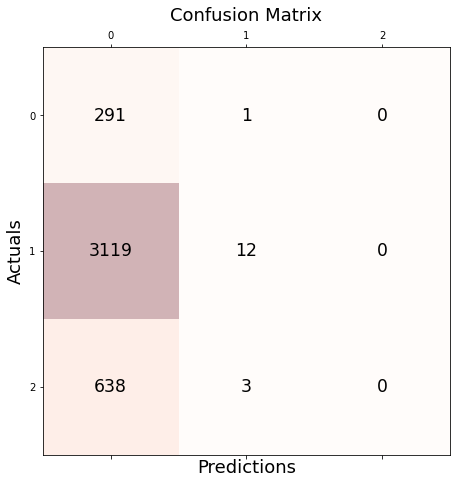

Accuracy =  0.07455708661417323
F1 Score
Macro:   0.04724256442021441
Micro:   0.07455708661417323
Weighted:   0.015510724093081034
None:  [0.13410138 0.00762631 0.        ]


In [ ]:
from sklearn.naive_bayes import GaussianNB
def GNB(X_train, X_test, y_train, y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)#fitting
    y_pred = clf.predict(X_test)#prediction
    GNB_acc = accuracy_score(y_pred, y_test)#accuracy
    GNB_CM = confusion_matrix(y_test, y_pred)#getting confusion matrix
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(GNB_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(GNB_CM.shape[0]):
        for j in range(GNB_CM.shape[1]):
            ax.text(x=j, y=i,s=GNB_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", GNB_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
GNB(X_train, X_test, y_train, y_test)

# LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def LDA(X_train, X_test, y_train, y_test):
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train, y_train)#fitting
    y_pred = clf.predict(X_test)#prediction
    LDA_acc = accuracy_score(y_pred, y_test)#getting accuracy
    LDA_CM = confusion_matrix(y_test, y_pred)#getting confusion matrix
    #printing and plotting
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(LDA_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(LDA_CM.shape[0]):
        for j in range(LDA_CM.shape[1]):
            ax.text(x=j, y=i,s=LDA_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", LDA_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
LDA(X_train, X_test, y_train, y_test)

# LogisticRegression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


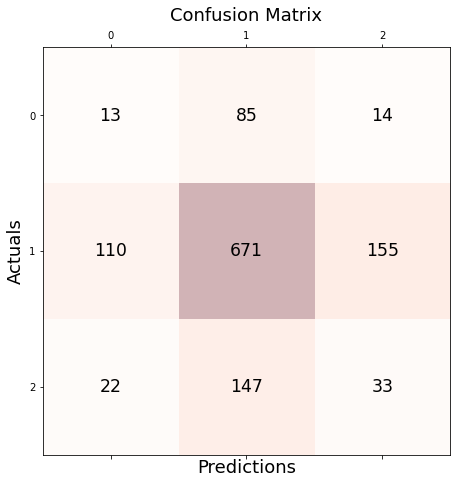

Accuracy =  0.5736
F1 Score
Macro:   0.3314260260424707
Micro:   0.5736
Weighted:   0.5818972178670949
None:  [0.10116732 0.72974443 0.16336634]


In [ ]:
from sklearn.linear_model import LogisticRegression
def LR(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(random_state=0, max_iter=2000 )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    LR_acc = accuracy_score(y_pred , y_test)
    LR_CM = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(LR_CM, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(LR_CM.shape[0]):
        for j in range(LR_CM.shape[1]):
            ax.text(x=j, y=i,s=LR_CM[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print("Accuracy = ", LR_acc)
    print("F1 Score")
    
    print("Macro:  ", f1_score(y_test, y_pred, average='macro'))

    print("Micro:  ",f1_score(y_test, y_pred, average='micro'))

    print("Weighted:  ",f1_score(y_test, y_pred, average='weighted'))

    print("None: ",f1_score(y_test, y_pred, average=None))
LR(X_train, X_test, y_train, y_test)

In [ ]:
# pipeline_lr = make_pipeline([('scalar1',StandardScaler()),
#                      ('lr_classifier',LogisticRegression())])
# pipeline_dt = make_pipeline([('scalar2',StandardScaler()),
#                      ('pca2',PCA(n_components=2)),
#                      ('dt_classifier',DecisionTreeClassifier())])
# pipeline_svm = make_pipeline([('scalar3', StandardScaler()),
#                       ('pca3', PCA(n_components=2)),
#                       ('clf', svm.SVC())])
# pipeline_knn = make_pipeline([('scalar4',StandardScaler()),
#                      ('pca4',PCA(n_components=2)),
#                      ('knn_classifier',KNeighborsClassifier())])
# pipeline_sgd = make_pipeline([('scalar5', StandardScaler()),(SGDClassifier(max_iter=1000, tol=1e-3))])
# pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]
# pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor'}
# for pipe in pipelines:
#     pipe.fit(X_train, y_train)
# for i,model in enumerate(pipelines):
#     print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))

3

In [1]:
import malaya_speech
import numpy as np
import librosa
from malaya_speech import Pipeline

/home/faaira/anaconda3/lib/python3.8/site-packages/malaya_boilerplate/frozen_graph.py:34: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  warnings.warn(


In [2]:
def norm_mel(y, sr):
    mel = librosa.feature.melspectrogram(y, sr = sr, n_mels = 80)
    return np.log10(np.maximum(mel, 1e-10)).T

def plot(y, sr):
    mel = norm_mel(y, sr)
    fig, axs = plt.subplots(2, figsize=(10, 8))
    axs[0].plot(y)
    im = axs[1].imshow(np.rot90(mel), aspect='auto', interpolation='none')
    fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=axs[1])
    plt.show()

from google.colab import drive

drive.mount('/content/drive')



In [3]:
y, sr = malaya_speech.load('/home/faaira/Desktop/new_data/wav_files/0a1b2f0a-afa2-42e3-9e60-998c4bdf1f95.wav')
len(y) / sr

9.96

In [4]:
import matplotlib.pyplot as plt
import IPython.display as ipd

In [5]:
len(y)

159360

In [6]:
ipd.Audio(y, rate = sr)

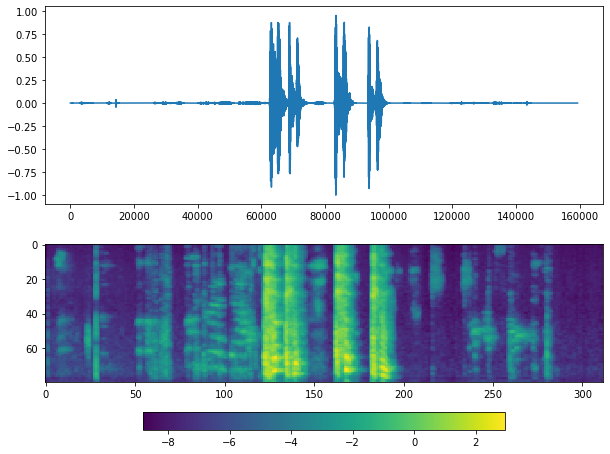

In [7]:
plot(y, sr)

In [8]:
y_ = librosa.effects.trim(y, top_db = 20)[0]

In [9]:
len(y_)

36864

In [10]:
ipd.Audio(y_, rate = sr)

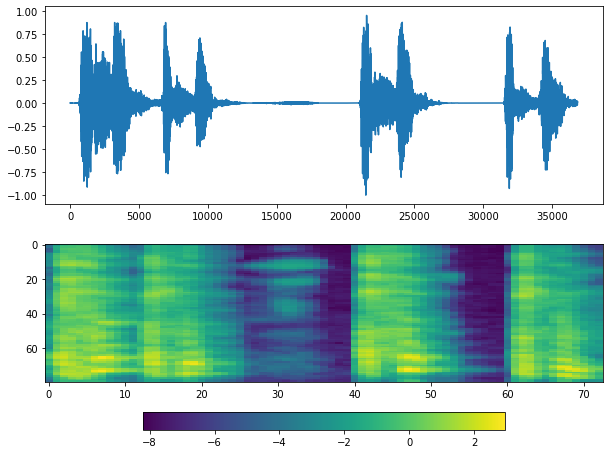

In [11]:
plot(y_, sr)


In [12]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [13]:
y_int = malaya_speech.astype.float_to_int(y)
audio = AudioSegment(
    y_int.tobytes(),
    frame_rate = sr,
    sample_width = y_int.dtype.itemsize,
    channels = 1
)

In [14]:
audio_chunks = split_on_silence(
    audio,
    min_silence_len = 200,
    silence_thresh = -30,
    keep_silence = 100,
)
audio_chunks

In [15]:
y_ = sum(audio_chunks)
y_ = np.array(y_.get_array_of_samples())
y_ = malaya_speech.astype.int_to_float(y_)

In [16]:
ipd.Audio(y_, rate = sr)

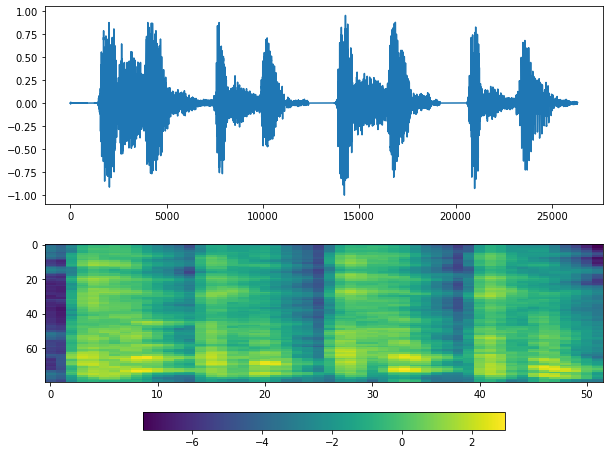

In [17]:
plot(y_, sr)

In [33]:
len(y_)

36280

In [36]:
file = open('file.txt','w')
for i in range(0,len(y_)):
    file.write(str(y_[i])+",")
file.close()